In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

def sf(x, a, n):
    return sym.SingularityFunction(x,a,n)

In [2]:
x = sym.symbols('x')
dx = 0.01
x0, x1, x2, x3, x4 = 0, 5, 7, 9, 13
C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14 = sym.symbols('C_1 C_2 C_3 C_4 C_5 C_6 C_7 C_8 C_9 C_10 C_11 C_12 C_13 C_14')
q = 8
F = 25
RvA,RvB,RvC,RhC = sym.symbols('R_v^A R_v^B R_v^C R_h^C')
EI = 1500
k = 1000

w1 = sym.Function('w_1')(x)
w2 = sym.Function('w_2')(x)

q1 = RvA * sf(x,x0,-1) + q * sf(x,x0,0) + RvB * sf(x,x1,-1) - q * sf(x,x1,0) + F * sf(x,x2,-1)
q2 = RvC * sf(x,x4,-1)

ODE1 = sym.Eq(EI * sym.diff(w1, x, 4), q1)
ODE2 = sym.Eq(k * sym.diff(w2, x, 2), q2)


w1 = sym.dsolve(ODE1).subs({'C1': C1, 'C2': C2, 'C3': C3, 'C4': C4}).rhs
o1 = -sym.diff(w1, x)
M1 = EI * sym.diff(o1, x)
V1 = sym.diff(M1, x)
w2 = sym.dsolve(ODE2).subs({'C1': C5, 'C2': C6}).rhs
V2 = k * sym.diff(w2, x)


eq1 = sym.Eq(w1.subs(x,x0),0)
eq2 = sym.Eq(M1.subs(x,x0-dx),0)
eq3 = sym.Eq(V1.subs(x,x0-dx),0)
eq4 = sym.Eq(w1.subs(x,x1),0)
eq5 = sym.Eq(w1.subs(x,x3)-w2.subs(x,x3),0)
eq6 = sym.Eq(o1.subs(x,x3),0)
eq7 = sym.Eq(V1.subs(x,x3)-V2.subs(x,x3),0)
eq8 = sym.Eq(w2.subs(x,x4),0)
eq9 = sym.Eq(V2.subs(x,x4+dx),0)

sol = sym.solve((eq1,eq2,eq3,eq4,eq5,eq6,eq7,eq8,eq9),(C1,C2,C3,C4,C5,C6,RvA,RvB,RvC))
display(sol)

{C_1: 0.0,
 C_2: 0.0136851399076338,
 C_3: 0.0,
 C_4: 0.0,
 C_5: 0.0778728606356968,
 C_6: -0.00599022004889976,
 R_v^A: -14.9266503667482,
 R_v^B: -44.0831295843521,
 R_v^C: 5.99022004889976}

0.0136851399076338*x - 0.00165851670741646*SingularityFunction(x, 0, 3) + SingularityFunction(x, 0, 4)/4500 - 0.00489812550937245*SingularityFunction(x, 5, 3) - SingularityFunction(x, 5, 4)/4500 + SingularityFunction(x, 7, 3)/360

-0.00599022004889976*x + 0.00599022004889975*SingularityFunction(x, 13, 1) + 0.0778728606356968

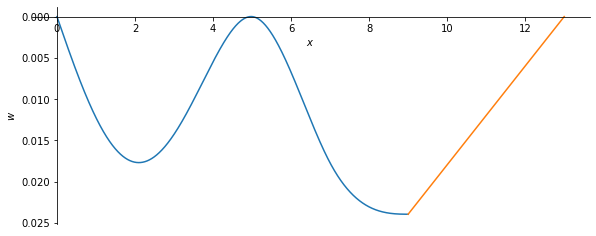

In [3]:
x1_np = np.linspace(0,9,10000)
x2_np = np.linspace(9,13,10000)

w1_np = sym.lambdify(x, w1.subs(sol).rewrite(sym.Piecewise))
display(w1.subs(sol))
w2_np = sym.lambdify(x, w2.subs(sol).rewrite(sym.Piecewise))
display(w2.subs(sol))

plt.figure(figsize=(10,4))
plt.plot(x1_np,w1_np(x1_np))
plt.plot(x2_np,w2_np(x2_np))
plt.xlabel('$x$')
plt.ylabel('$w$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()

14.9266503667482*SingularityFunction(x, 0, 0) - 8*SingularityFunction(x, 0, 1) + 44.0831295843521*SingularityFunction(x, 5, 0) + 8*SingularityFunction(x, 5, 1) - 25*SingularityFunction(x, 7, 0)

5.99022004889976*SingularityFunction(x, 13, 0) - 5.99022004889976

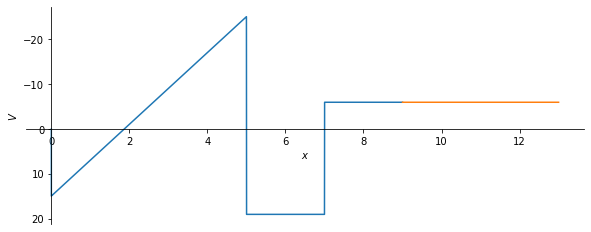

In [4]:
display(V1.subs(sol))
display(V2.subs(sol))

V1 = V1.subs(sol).rewrite(sym.Piecewise)
V2 = V2.subs(sol).rewrite(sym.Piecewise)

V1_np = sym.lambdify(x, V1) if V1.free_symbols else float(V1)
V2_np = sym.lambdify(x, V2) if V2.free_symbols else float(V2)


plt.figure(figsize=(10,4))
plt.plot(x1_np,V1_np(x1_np)) if callable(V1_np) else plt.plot(x1_np,V1_np*np.ones(len(x1_np)))
plt.plot(x2_np,V2_np(x2_np)) if callable(V2_np) else plt.plot(x2_np,V2_np*np.ones(len(x2_np)))
plt.xlabel('$x$')
plt.ylabel('$V$');
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.invert_yaxis()